In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from statsmodels.api import OLS
import statsmodels.api as sm



%matplotlib inline

import seaborn as sns

sns.set()

C:\Users\genie\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\genie\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stockdf = pd.read_pickle("035720.bz2")

In [3]:
y_data = stockdf.등락률[:-1]
x_data = stockdf.iloc[:,stockdf.columns != '등락률'][1:]
x_data = x_data.drop('날짜',axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.25, random_state=42)

In [5]:
stockdf.corr()

,등락률,기관 순매매량,외국인 순매매량,외국인 보유율,종가,시가,고가,저가,거래량,기간
등락률,1.000000,0.496914,0.219724,0.013221,0.023653,-0.079063,-0.029506,-0.030781,-0.006049,-0.059190
기관 순매매량,0.496914,1.000000,-0.062476,0.043178,0.159250,0.108997,0.131259,0.135362,0.222434,0.044224
외국인 순매매량,0.219724,-0.062476,1.000000,0.064913,-0.156282,-0.185715,-0.176292,-0.171103,-0.081782,-0.092361
외국인 보유율,0.013221,0.043178,0.064913,1.000000,0.301238,0.294684,0.295340,0.302273,0.113947,0.229043
종가,0.023653,0.159250,-0.156282,0.301238,1.000000,0.993112,0.997047,0.997093,0.303791,0.525714
시가,-0.079063,0.108997,-0.185715,0.294684,0.993112,1.000000,0.997313,0.997340,0.305055,0.524669
고가,-0.029506,0.131259,-0.176292,0.295340,0.997047,0.997313,1.000000,0.997122,0.325991,0.525593
저가,-0.030781,0.135362,-0.171103,0.302273,0.997093,0.997340,0.997122,1.000000,0.285294,0.527528
거래량,-0.006049,0.222434,-0.081782,0.113947,0.303791,0.305055,0.325991,0.285294,1.000000,-0.066279
기간,-0.059190,0.044224,-0.092361,0.229043,0.525714,0.524669,0.525593,0.527528,-0.066279,1.000000


0.1575725593667546

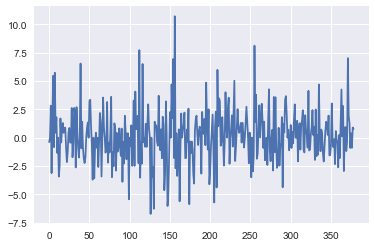

In [87]:
plt.plot(y_data)
y_data.mean()

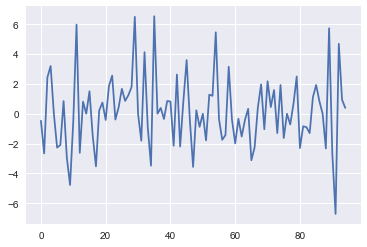

In [98]:
plt.plot(X_test_scale.index,y_test)

In [6]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = pd.DataFrame(data = scale.transform(X_train), columns = X_train.columns.tolist())
X_test_scale = pd.DataFrame(data = scale.transform(X_test), columns = X_test.columns.tolist())

In [7]:

X_train_scale_add = sm.add_constant(X_train_scale)
X_test_scale_add = sm.add_constant(X_test_scale)
y_train_re = y_train.values.reshape(-1,1)
y_test_re = y_test.values.reshape(-1,1)
OLSmodel = OLS(y_train_re,X_train_scale_add).fit()
OLSmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     3.442
Date:                Sat, 18 Aug 2018   Prob (F-statistic):           0.000490
Time:                        00:46:12   Log-Likelihood:                -625.99
No. Observations:                 284   AIC:                             1272.
Df Residuals:                     274   BIC:                             1308.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1596      0.132      1.205      0.229      -0.101       0.420
기관 순매매량        0.6395      0.157      4.061      0.000       0.329       0.950
외국인 순매매량       0.2233      0.142      1.574      0.117      -0.056       0.503
외국인 보유율        0.1007      0.143      0.706      0.480      -0.180       0.381
종가            -2.6087      2.687     -0.971      0.333      -7.899       2.682
시가             5.3258      2.891      1.842      0.067      -0.366      11.017
고가             4.4587      3.224      1.383      0.168      -1.887      10.805
저가            -7.3169      3.327     -2.199      0.029     -13.867      -0.767
거래량           -0.6039      0.188     -3.204      0.002      -0.975      -0.233
기간            -0.2117      0.165     -1.286      0.199      -0.536       0.112
==============================================================================
Omnibus:                       21.906   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.540
Skew:                           0.417   Prob(JB):                     5.79e-10
Kurtosis:                       4.703   Cond. No.                         79.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
yhat = OLSmodel.predict(X_test_scale_add)
print("rscore {0}".format(r2_score(y_test,yhat)))
print("mean of profit : {0}".format(OLSmodel.predict(X_test_scale_add).mean()))


rscore -0.07109139938631515
mean of profit : 0.2194733497919889


-0.07109139938631515

In [89]:
linearmodel = LinearRegression().fit(X_train_scale,y_train)
print("rscore {0}".format(linearmodel.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(linearmodel.predict(X_test_scale).mean()))
{k: v for k,v in zip(X_train_scale.columns, linearmodel.coef_.ravel())}

-0.07109139938631515
mean of profit : 0.2194733497919909


{'거래량': -0.6038838995727712,
 '고가': 4.45868209913728,
 '기간': -0.21170919940580074,
 '기관 순매매량': 0.6395089187823471,
 '시가': 5.325824356076458,
 '외국인 보유율': 0.10069299291096899,
 '외국인 순매매량': 0.22329197425159242,
 '저가': -7.316880447576435,
 '종가': -2.6086563036863426}

In [95]:
Ridge = RidgeCV().fit(X_train_scale,y_train)
print("rscore {0}".format(Ridge.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(Ridge.predict(X_test_scale).mean()))
{k: v for k,v in zip(X_train_scale.columns, Ridge.coef_.ravel())}

rscore -0.06383842341159385
mean of profit : 0.2184031264810883


{'거래량': -0.5473516959723668,
 '고가': 3.9488675476305275,
 '기간': -0.200121211736203,
 '기관 순매매량': 0.6082480241593657,
 '시가': 4.428783899866573,
 '외국인 보유율': 0.08760505784208306,
 '외국인 순매매량': 0.208565486086826,
 '저가': -5.798970438925409,
 '종가': -2.738981804256696}

In [96]:
Lassomodel = LassoCV().fit(X_train_scale,y_train)
print("rscore {0}".format(Lassomodel.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(Lassomodel.predict(X_test_scale).mean()))

C:\Users\genie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


rscore -0.06348231928402615
mean of profit : 0.2152486906666355


C:\Users\genie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [97]:
RandomRegression = RandomForestRegressor().fit(X_train_scale,y_train)
print("rscore {0}".format(RandomRegression.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(RandomRegression.predict(X_test_scale).mean()))

rscore -0.08530025341916425
mean of profit : 0.11206315789473685


In [101]:
Adaregressor = AdaBoostRegressor().fit(X_train_scale,y_train)
print("rscore {0}".format(linearmodel.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(linearmodel.predict(X_test_scale).mean()))

rscore -0.07109139938631515
mean of profit : 0.2194733497919909


In [15]:
def evaluate_strategy(model, df, profit, cutoff=None, showprint=True):
    # see where our model says to invest
    inv = model.predict(df)
    if cutoff is not None: 
        inv = inv > cutoff
        inv = inv.reshape(-1)
    # return the mean return
    if showprint:
        print("Positive result on %d out of %d (%0.2f%%)" % (inv.sum(), inv.shape[0], inv.sum() / inv.shape[0] * 100.0))
        print("Mean return of strategy:", profit[inv].mean())
        print("Overall return:", profit.mean())
    return profit[inv].mean(), profit.mean()

In [16]:
y_train_cat = y_train > 0
y_test_cat = y_test >0

In [108]:
Logist =LogisticRegressionCV().fit(X_train_scale, y_train_cat)
print(accuracy_score(y_test_cat,Logist.predict(X_test_scale)))
evaluate_strategy(Logist,X_test_scale,y_test)

0.4631578947368421
Positive result on 34 out of 95 (35.79%)
Mean return of strategy: -0.2958823529411765
Overall return: 0.15147368421052626


(-0.2958823529411765, 0.15147368421052626)

In [105]:
Decision = DecisionTreeClassifier().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,Decision.predict(X_test_scale)))
evaluate_strategy(Decision,X_test_scale,y_test)

0.5052631578947369
Positive result on 42 out of 95 (44.21%)
Mean return of strategy: 0.27404761904761915
Overall return: 0.15147368421052626


(0.27404761904761915, 0.15147368421052626)

In [106]:
RandomForest = RandomForestClassifier().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,RandomForest.predict(X_test_scale)))
evaluate_strategy(RandomForest,X_test_scale,y_test)

0.5157894736842106
Positive result on 35 out of 95 (36.84%)
Mean return of strategy: 0.5571428571428573
Overall return: 0.15147368421052626


(0.5571428571428573, 0.15147368421052626)

In [78]:
AdaCL = AdaBoostClassifier(n_estimators=300,learning_rate=0.05).fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,AdaCL.predict(X_test_scale)))
evaluate_strategy(AdaCL,X_test_scale,y_test)


0.5473684210526316
Positive result on 44 out of 95 (46.32%)
Mean return of strategy: 0.384090909090909
Overall return: 0.15147368421052626


(0.384090909090909, 0.15147368421052626)

In [23]:
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train_scale)
X_test_poly = poly.fit_transform(X_test_scale)

newscaler = StandardScaler().fit(X_train_poly)

X_train_poly = newscaler.transform(X_train_poly)
X_test_poly = newscaler.transform(X_test_poly)

In [25]:
polylog = LogisticRegressionCV().fit(X_train_poly,y_train_cat)
print(accuracy_score(y_test_cat,polylog.predict(X_test_poly)))
evaluate_strategy(polylog,X_test_poly,y_test)


0.5052631578947369
Positive result on 24 out of 95 (25.26%)
Mean return of strategy: -0.017499999999999977
Overall return: 0.15147368421052626


(-0.017499999999999977, 0.15147368421052626)

In [110]:
polyridge = RidgeCV().fit(X_train_poly,y_train)
print("rscore {0}".format(polyridge.score(X_test_poly,y_test)))
print("mean of profit : {0}".format(polyridge.predict(X_test_poly).mean()))

rscore -0.43888142621803516
mean of profit : 0.20308272760436602


In [111]:
SVM = SVC().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,SVM.predict(X_test_scale)))
evaluate_strategy(SVM,X_test_scale,y_test)


0.4842105263157895
Positive result on 44 out of 95 (46.32%)
Mean return of strategy: -0.023409090909090945
Overall return: 0.15147368421052626


(-0.023409090909090945, 0.15147368421052626)

In [112]:
LDA =LinearDiscriminantAnalysis().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,LDA.predict(X_test_scale)))
evaluate_strategy(LDA,X_test_scale,y_test)

0.5684210526315789
Positive result on 42 out of 95 (44.21%)
Mean return of strategy: 0.4285714285714287
Overall return: 0.15147368421052626


(0.4285714285714287, 0.15147368421052626)

In [113]:
QDA = QuadraticDiscriminantAnalysis().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,QDA.predict(X_test_scale)))
evaluate_strategy(QDA,X_test_scale,y_test)

0.5052631578947369
Positive result on 32 out of 95 (33.68%)
Mean return of strategy: 0.13468750000000002
Overall return: 0.15147368421052626


(0.13468750000000002, 0.15147368421052626)

In [114]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,KNN.predict(X_test_scale)))
evaluate_strategy(KNN,X_test_scale,y_test)

0.5578947368421052
Positive result on 57 out of 95 (60.00%)
Mean return of strategy: 0.38982456140350896
Overall return: 0.15147368421052626


(0.38982456140350896, 0.15147368421052626)

In [32]:
model_nn = Sequential()
model_nn.add(Dense(715, input_dim=X_train_poly.shape[1], activation='relu'))
model_nn.add(Dense(500, activation='relu'))
model_nn.add(Dense(300, activation='relu'))
model_nn.add(Dense(150, activation='relu'))
model_nn.add(Dense(100, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))
model_nn.compile(loss='mse', optimizer='adam')
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 715)               511940    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               358000    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
__________

In [33]:
model_nn.fit(X_train_poly, y_train_cat, epochs=50, batch_size=715, validation_split=0.2)

Train on 227 samples, validate on 57 samples
Epoch 1/50
227/227 [==============================] - 1s 5ms/step - loss: 0.5586 - val_loss: 0.3563
Epoch 2/50
227/227 [==============================] - 0s 263us/step - loss: 0.3892 - val_loss: 0.3436
Epoch 3/50
227/227 [==============================] - 0s 276us/step - loss: 0.2613 - val_loss: 0.3716
Epoch 4/50
227/227 [==============================] - 0s 303us/step - loss: 0.2994 - val_loss: 0.5678
Epoch 5/50
227/227 [==============================] - 0s 289us/step - loss: 0.3407 - val_loss: 0.3159
Epoch 6/50
227/227 [==============================] - 0s 309us/step - loss: 0.2273 - val_loss: 0.2805
Epoch 7/50
227/227 [==============================] - 0s 265us/step - loss: 0.2538 - val_loss: 0.2812
Epoch 8/50
227/227 [==============================] - 0s 294us/step - loss: 0.2317 - val_loss: 0.3066
Epoch 9/50
227/227 [==============================] - 0s 277us/step - loss: 0.2251 - val_loss: 0.3227
Epoch 10/50
227/227 [==================

In [35]:
r2_score(y_test,model_nn.predict(X_test_poly))

-0.06804986904893262

In [36]:
list_model = ["Singletree",'RF', 'Ada', 'Logit', 'QDA','LDA','KNN']
model_dict = [Decision,RandomForest,AdaCL,Logist,QDA,LDA,KNN]
tune_index_name =['train row {0}'.format(i+1) for i in range(len(X_train_scale))]
ensemble_test_index_name =['test row {0}'.format(i+1) for i in range(len(X_test_scale))]                
                                                                                                                                    
#make empty dataframe with index i made
ensemble_tune = pd.DataFrame(index=tune_index_name)
ensemble_test = pd.DataFrame(index=ensemble_test_index_name)

#make dataset with prediction.
for n,i in zip(list_model,model_dict):
    ensemble_tune["{0}'s model prediction".format(n)] = [i[1] for i in i.predict_proba(X_train_scale)]
    ensemble_test["{0}'s model prediction".format(n)] = [i[1] for i in i.predict_proba(X_test_scale)]


,Singletree's model prediction,RF's model prediction,Ada's model prediction,Logit's model prediction,QDA's model prediction,LDA's model prediction,KNN's model prediction
test row 1,0.0,0.2,0.496489,0.497540,0.429661,0.406794,0.2
test row 2,0.0,0.7,0.500511,0.514902,0.212924,0.618497,0.8
test row 3,0.0,0.6,0.500241,0.555326,0.629460,0.601053,0.6
test row 4,0.0,0.1,0.427855,0.413195,0.257585,0.411043,0.0
test row 5,1.0,0.2,0.498961,0.467114,0.201684,0.395465,0.4


In [37]:
metamodel = LogisticRegressionCV().fit(ensemble_tune,y_train_cat)
print(accuracy_score(y_test_cat,metamodel.predict(ensemble_test)))
evaluate_strategy(metamodel,ensemble_test,y_test)

0.5894736842105263
Positive result on 44 out of 95 (46.32%)
Mean return of strategy: 0.43681818181818194
Overall return: 0.15147368421052626


(0.43681818181818194, 0.15147368421052626)

In [38]:
X_tommorow = pd.DataFrame(data = scale.transform(x_data[0:10]), columns = X_train.columns.tolist())

poly = PolynomialFeatures(4)

X_tommorow_poly = poly.fit_transform(X_tommorow)

X_tommorow_poly = newscaler.transform(X_tommorow_poly)
X_tommorow_poly

array([[ 0.        ,  0.90353714, -0.15758999, ..., -0.04015855,
        -1.44587618,  3.41689895],
       [ 0.        ,  1.00381798, -0.08484454, ..., -0.09884921,
        -1.17017435,  3.30386542],
       [ 0.        ,  0.1083779 , -0.00347045, ..., -0.20825055,
        -0.43084144,  3.2482268 ],
       ...,
       [ 0.        ,  0.03039677,  0.12381803, ...,  0.61886532,
        -2.93342008,  2.87477141],
       [ 0.        , -0.19839827,  0.19640917, ...,  0.66582214,
        -2.9494349 ,  2.72307878],
       [ 0.        , -0.39994888, -0.09068912, ...,  0.26000638,
        -2.14166126,  2.6736002 ]])

In [39]:
today_meta = pd.DataFrame(index=stockdf.날짜[0:10])
for n,i in zip(list_model,model_dict):
    today_meta["{0}'s model prediction".format(n)] = [i[1] for i in i.predict_proba(X_tommorow)]
metamodel.predict(today_meta)

array([False, False,  True,  True,  True, False, False,  True,  True,
        True])

In [79]:
all_model = ['linearmodel','Lassomodel','Ridge','polyridge','RandomRegression','Adaregressor',
        'model_nn','Logist','polylog','Decision','RandomForest','AdaCL','SVM','LDA','QDA','KNN','metamodel']

all_dict = [linearmodel,Lassomodel,Ridge,polyridge,RandomRegression,Adaregressor,
           model_nn,Logist,polylog,Decision,RandomForest,AdaCL,SVM,LDA,QDA,KNN,metamodel]

Regression = ['linearmodel','Lassomodel','Ridge','polyridge','RandomRegression','Adaregressor',
           'model_nn']
Regression_model = [linearmodel,Lassomodel,Ridge,polyridge,RandomRegression,Adaregressor,
           model_nn]


Logistic = ['Logist','polylog','Decision','RandomForest','AdaCL','SVM','LDA','QDA','KNN','metamodel']
Logistic_model = [Logist,Decision,RandomForest,AdaCL,LDA,QDA,KNN]
Polynomial = [polyridge,model_nn,polylog]
index = []

for i in range(10):
    index.append("{0}'s next day".format(stockdf.날짜[i]))




result = pd.DataFrame(index=index,columns=all_model)

for n,i in zip(all_model,all_dict):
    if i in Polynomial:
        result[n] =i.predict(X_tommorow_poly)
    elif i == metamodel:
        result[n] =metamodel.predict(today_meta)
    else:
        result[n] =i.predict(X_tommorow)
    
result["mean"] = result[Regression].mean(axis=1)

result["percentage of true"] = result[Logistic].mean(axis=1)
result["true"] = [0]+[i for i in y_data[0:9]]